<a href="https://colab.research.google.com/github/AmmarMahmoudIbrahiem/House-Price-Prediction--Exploratoy-Data-Analysis-and-ML-/blob/main/Brain_stroke_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the depandencise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data colocation and data processing

In [3]:
data=pd.read_csv('/content/brain_stroke.csv',)

In [11]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [ ]:
data.shape

In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data1=data.isnull().sum()/len(data)*100
data1

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [12]:
#ammamr = list(columns for columns in data.select_dtypes([object]).columns)
dtype_objects = list(columns for columns in data.select_dtypes([object]).columns)
dtype_objects 

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

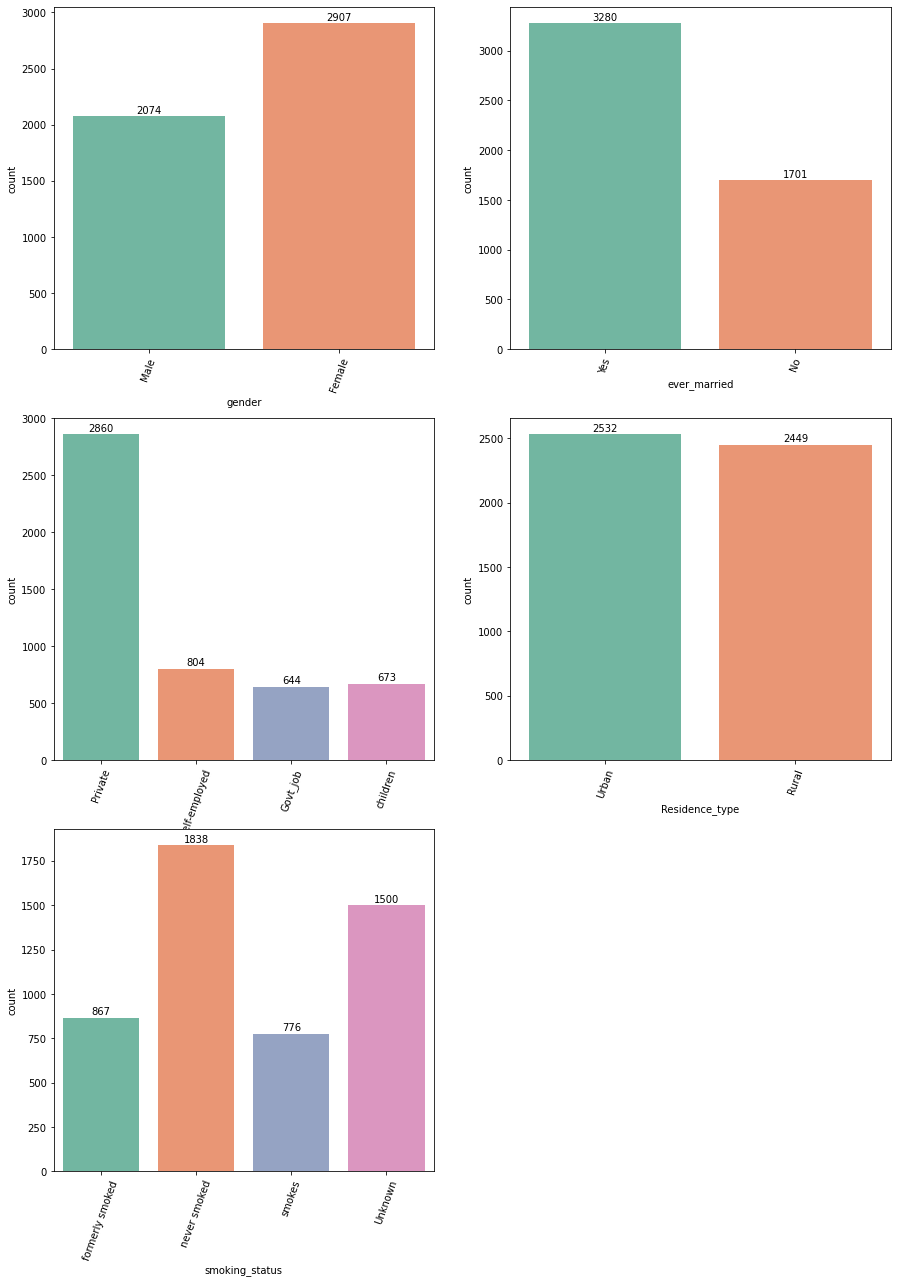

In [13]:
## countplot for datatype with objects

plt.figure(figsize=(15,150))
plotnumber=1
for c in dtype_objects:
    ax=plt.subplot(20,2,plotnumber)
    b= sns.countplot(x=data[c],palette='Set2')
    plt.xticks(rotation=70)
    plotnumber+=1
    for bar in b.patches:
        b.annotate(format(bar.get_height()),
            (bar.get_x() + bar.get_width() / 2,
            bar.get_height()), ha='center', va='center',
            size=10, xytext=(0, 6),textcoords='offset points')
plt.show() 

In [14]:
data_float=list(colunms for colunms in data.select_dtypes([float]).columns)
data_float

['age', 'avg_glucose_level', 'bmi']

<Figure size 720x7200 with 0 Axes>

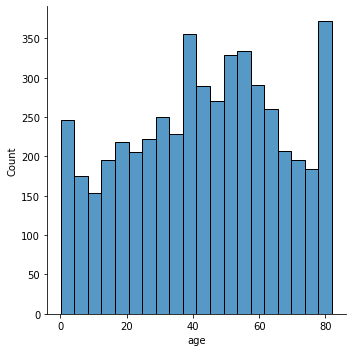

<Figure size 720x7200 with 0 Axes>

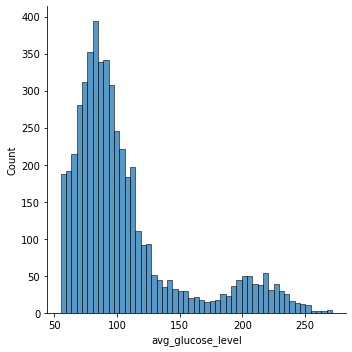

<Figure size 720x7200 with 0 Axes>

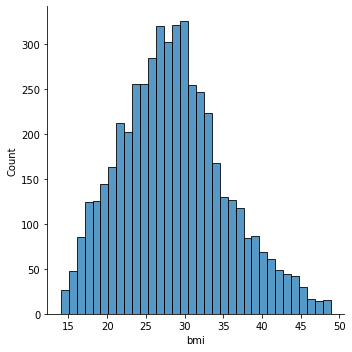

In [15]:
for c in data_float:
  plt.figure(figsize=(10,100))
  #plt.xticks(rotation=30)
  sns.displot(data[c])
plt.show()

In [16]:
#unique.value_counts()
data.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Female  0.08   0             0              No            children       Urban           139.67             14.1  Unknown          0         1
Male    17.00  0             0              No            Private        Rural           94.92              23.5  never smoked     0         1
                                                                         Urban           85.07              21.1  never smoked     0         1
                                                                                         71.58              25.6  Unknown          0         1
                                                                                         63.28              40.2  Unknown          0         1
                                                                                                                                            ..
Fema

In [33]:
len(dtype_objects)

5

In [17]:
for cols in data.columns:
  print(cols)

gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


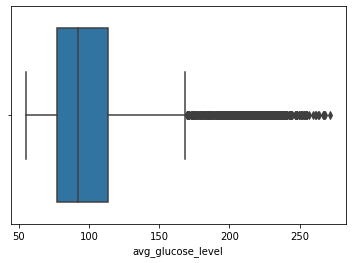

In [18]:
sns.boxplot(data['avg_glucose_level'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


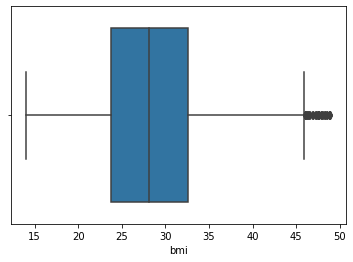

In [58]:

sns.boxplot(data['bmi'])

In [19]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.278120,0.264852,0.236763,0.373703,0.246478
hypertension,0.278120,1.000000,0.111974,0.170028,0.158762,0.131965
heart_disease,0.264852,0.111974,1.000000,0.166847,0.060926,0.134610
avg_glucose_level,0.236763,0.170028,0.166847,1.000000,0.186348,0.133227
bmi,0.373703,0.158762,0.060926,0.186348,1.000000,0.056926
stroke,0.246478,0.131965,0.134610,0.133227,0.056926,1.000000


In [61]:
data.drop(columns=['bmi'],axis=1)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,smokes,0


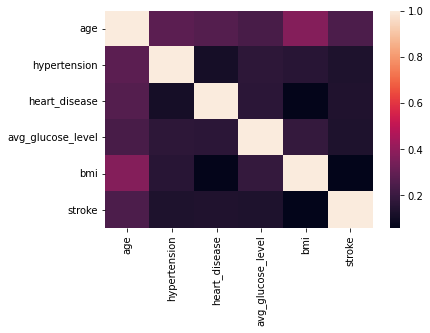

In [63]:
sns.heatmap(data.corr())

In [21]:
data=pd.get_dummies(data ,['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [22]:
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0
4977,40.0,0,0,191.15,31.1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4978,45.0,1,0,95.02,31.8,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1
4979,40.0,0,0,83.94,30.0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1


In [23]:
from sklearn.model_selection import train_test_split

In [25]:
x=data.drop(columns=['stroke'],axis=1)
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,1,0,0,1,0,0,1,0,0,1,0,0
4977,40.0,0,0,191.15,31.1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4978,45.0,1,0,95.02,31.8,1,0,0,1,1,0,0,0,1,0,0,0,0,1
4979,40.0,0,0,83.94,30.0,0,1,0,1,0,1,0,0,1,0,0,0,0,1


In [27]:
y=data['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [34]:
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=3)


In [30]:
#from sklearn.preprocessing import MinMaxScaler
#scale=MinMaxScaler()
#scale.fit_transform(x)

array([[0.81689453, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.97558594, 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.59716797, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.54833984, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.48730469, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.97558594, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [37]:
x_train , x_test , y_train ,y_test= train_test_split(x,y,test_size=0.15, random_state=42)
x_train.shape, x_test.shape , y_train.shape ,y_test.shape

((4233, 19), (748, 19), (4233,), (748,))

In [38]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
scale.fit_transform(x_train)

array([[0.25537109, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.95117188, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.47509766, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15771484, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00488281, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69482422, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [54]:
from sklearn.linear_model import LogisticRegression


In [53]:
log_reg=LogisticRegression(random_state=3)
log_reg.fit(x_train,y_train)
y_pred=log_reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [51]:
from sklearn.metrics import confusion_matrix,r2_score

In [44]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[708,   0],
       [ 40,   0]])

In [67]:
print('Training-set accuracy score:', log_reg.score(x_train, y_train))

Training-set accuracy score: 0.9508622726198913


In [68]:
print('testing-set accuracy score:', log_reg.score(x_test, y_test))

testing-set accuracy score: 0.946524064171123


In [56]:
from sklearn import metrics

In [63]:
acc_log_clf = metrics.accuracy_score(y_test, y_pred)
acc_log_clf

0.946524064171123

Score :  0.946524064171123


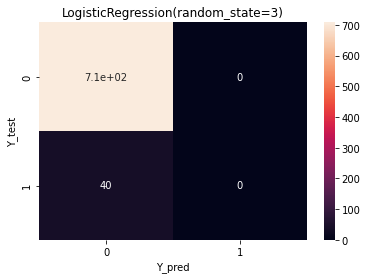

In [65]:
pred_list = [log_reg]

for i in pred_list:
    print("Score : ",i.score(x_test,y_test))
    y_pred = i.predict(x_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()